# "Intro to hypothesis tests"
> "Normal distribution and & Z-test"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: false

// width of the content area
// can be set as "px" or "%"
$content-width:    800px;
$on-palm:          800px;
$on-laptop:        800px;
$on-medium:        800px;
$on-large:         1200px;

 The lectures at LeWagon bootcamp are great. A wide range of practical information is packed in a 2 hour lecture. However, it is virtually impossible to convey a complex concept in depth within such short time. One has to dig deep into the topic after the lectures to fully understand what's really going on. As a current student at the bootcamp, I am writing these posts to fill the gaps between my understanding of the topic.
 
 Ultimately, I would like to find the answer for the following question:\
 **'So why do we learn this topic for data science boot camp.'**

In [517]:
#hide
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import altair as alt
import random
import scipy

## Why is Central Limit Theorem (CLT) Relevant?

Once you have a dataset of interest, you would want to describe it and draw conclusion statistically (descriptive and inferential statistics). For that, you will want to use a set of existing statistical tests and scores (Z-score, t-test, ANOVA, etc). Many of these tests and scores share a common assumption: **the data is normally distributed**. Unless you are willing to develop your own tests (which is not a trivial task), you will have to make sure your dataset meets the assumption.

Unfortunately, many of the distributions you will encounter are not normal. But do not panic. We have a way to transform any distribution into approximately normal distribution - in fact, this is why most statistical techniques assume normal distribution. As you have already learned in the previous lecture, central limit theorem provides the theoretical basis for the transformation.

CLT states that the sampling distribution of the mean of any independent,random variable will be normal or nearly normal, if the sample size is large enough. **In other words, the distribution of the mean of means will follow normal distribution as long as the sample size of each measurement is big enough regardless of the original population distribution.** 

For formal proof of central limit theorem, check [this paper.](https://www.cs.toronto.edu/~yuvalf/CLT.pdf)

In [526]:
#Read CSV file
path = 'dataset/uk_income_distribution_2020.xlsx'
df = pd.read_excel(path)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.columns = ['Income_band', 'Count(1000s)']

#The data provides household count. Procedure to make each row represents a sample.
dist_df = pd.DataFrame()
for i, j in df.iterrows():
    temp_df = pd.DataFrame((random.choices(range(int(j['Income_band']), int(j['Income_band']+1000)), k= int(j['Count(1000s)']))))
    dist_df = pd.concat([dist_df, temp_df])

In [533]:
df.head()

,Income_band,Count(1000s)
0,0,156.649969
1,1000,101.825940
2,2000,153.481454
3,3000,119.431524
4,4000,155.372368


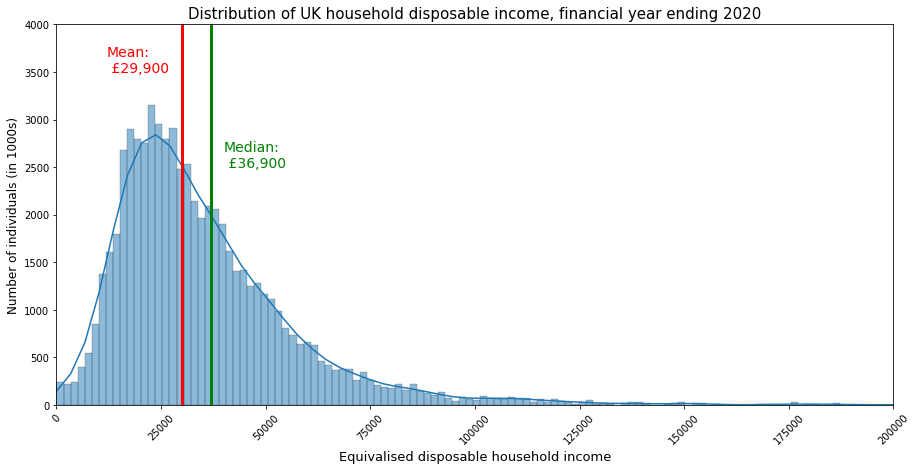

In [549]:
#hide_input
plt.figure(figsize=(15, 7))
ax = sns.histplot(dist_df, bins = 400, legend = False, kde = True)
plt.axvline(29900, color = 'red', lw = 3)
plt.axvline(36900, color = 'green', lw = 3)
#tick_spacing = 10000
#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 45)
plt.xlim(0, 200000)
plt.ylim(0, 4000)
plt.title('Distribution of UK household disposable income, financial year ending 2020', fontsize = 15)
plt.xlabel('Equivalised disposable household income', fontsize=13)
plt.ylabel('Number of individuals (in 1000s)', fontsize = 12)

plt.text(12000, 3500, 'Mean:\n £29,900', fontsize = 14, color = 'red')
plt.text(40000, 2500, 'Median:\n £36,900', fontsize = 14, color = 'green');

/home/byungjae/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


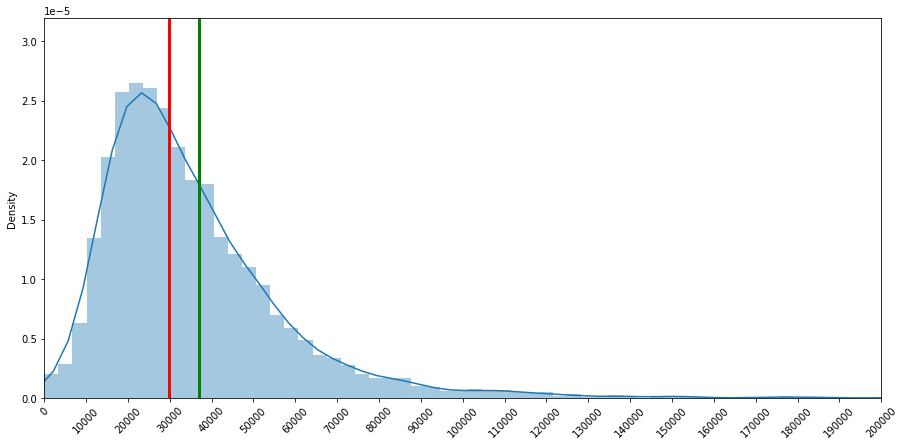

In [524]:
plt.figure(figsize=(15, 7))
ax = sns.distplot(dist_df, bins = 200)
plt.axvline(29900, color = 'red', lw = 3)
plt.axvline(36900, color = 'green', lw = 3)
tick_spacing = 10000
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 45)
plt.xlim(0, 200000)
plt.ylim(0, 3.2e-5);

path = 'dataset/uk_income_distribution_2020.xlsx'
df = pd.read_excel(path)

In [518]:
path = 'dataset/uk_income_distribution_2020.xlsx'
df = pd.read_excel(path)

In [519]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.columns = ['Income_band', 'Count(1000s)']

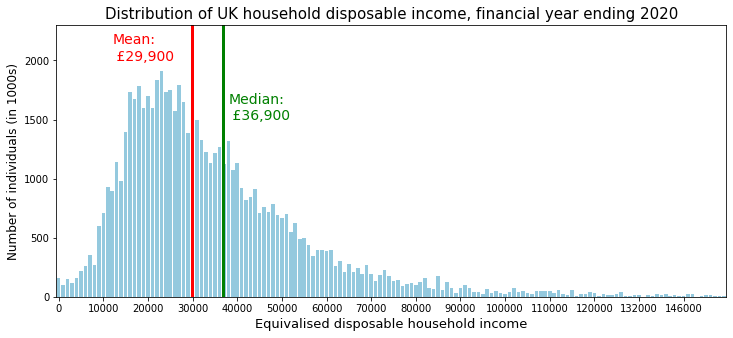

In [520]:
#Hide
#Source: https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/financialyear2020
plt.figure(figsize= (12, 5))
ax = sns.barplot(x = 'Income_band', y = 'Count(1000s)', data = df.head(150), color = 'skyblue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.axvline(29.9, color = 'red', lw = 3)
plt.axvline(36.9, color = 'green', lw = 3)
plt.text(12, 2000, 'Mean:\n £29,900', fontsize = 14, color = 'red')
plt.text(38, 1500, 'Median:\n £36,900', fontsize = 14, color = 'green')
plt.ylim(0, 2300)

plt.title('Distribution of UK household disposable income, financial year ending 2020', fontsize = 15)
plt.xlabel('Equivalised disposable household income', fontsize=13)
plt.ylabel('Number of individuals (in 1000s)', fontsize = 12);

Above is the household income distribution in the UK in 2020.\
There are number of observations relevant to our lecture on [Statistics and Probability](https://kitt.lewagon.com/camps/524/challenges?path=03-Maths%2F02-Statistics-Probabilities%2F02-Toss-a-Coin)
1) Mean > Median\
It is a **right skewed distribution** or **positively skewed distribution**.

In [521]:
df.head()

,Income_band,Count(1000s)
0,0,156.649969
1,1000,101.825940
2,2000,153.481454
3,3000,119.431524
4,4000,155.372368


In [484]:
dist_df = pd.DataFrame()
for i, j in df.iterrows():
    temp_df = pd.DataFrame((random.choices(range(int(j['Income_band']), int(j['Income_band']+1000)), k= int(j['Count(1000s)']))))
    dist_df = pd.concat([dist_df, temp_df])

In [499]:
np.median(dist_df)

30456.5

/home/byungjae/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


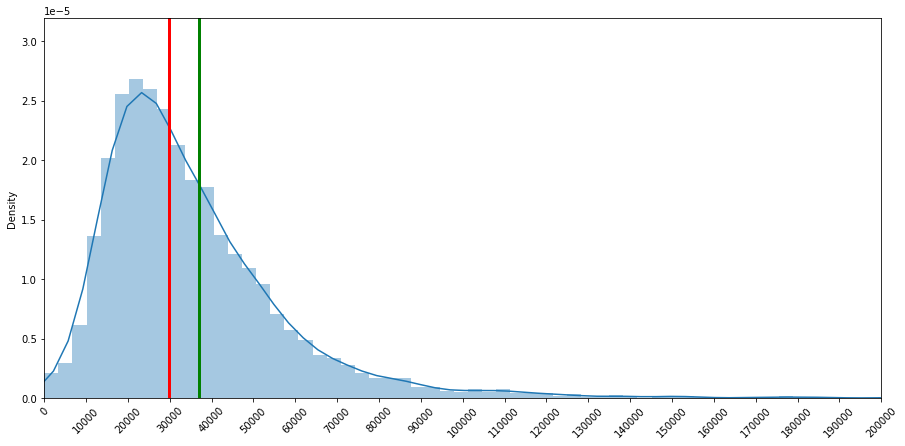

In [516]:
plt.figure(figsize=(15, 7))
ax = sns.distplot(dist_df, bins = 200)
plt.axvline(29900, color = 'red', lw = 3)
plt.axvline(36900, color = 'green', lw = 3)
tick_spacing = 10000
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation = 45)
plt.xlim(0, 200000)
plt.ylim(0, 3.2e-5);

In [506]:
dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65614 entries, 0 to 21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       65614 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [509]:
np.sum(df['Count(1000s)']) * 1000

65712609.37142122